### Just to check that mapping query cells to reference PCA works as intended

In [1]:
import os
import sys

import numpy as np
import scanpy as sc

In [2]:
JUPYTER_DIR = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.join(JUPYTER_DIR, "symphonypy"))
sys.path

['/home/ku/projs/symphony',
 '/home/ku/mambaforge/envs/symphony/lib/python310.zip',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10/lib-dynload',
 '',
 '/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages',
 '/home/ku/projs/symphony/symphonypy']

In [3]:
import symphonypy as sp

In [4]:
adata = sc.read("data/PBMC_Satija.h5ad")
adata

AnnData object with n_obs × n_vars = 17159 × 20729
    obs: 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'

In [5]:
adata_ref = adata
adata_query = adata.copy()
n_comps = 20
batch_keys = ["donor"]
raw_counts = True
n_top_genes = 3000

use_genes_column = "highly_variable"

search_highly_variable = (
    use_genes_column == "highly_variable" and "highly_variable" not in adata_ref.var
)

In [6]:
sp.utils.preprocess_ref_PCA(
    adata_ref,
    n_comps=n_comps,
    batch_keys=batch_keys,
    raw_counts=raw_counts,
    n_top_genes=n_top_genes,
    search_highly_variable=search_highly_variable
)

ref_basis_loadings = "PCs"
query_basis_ref = "X_pca_ref"

In [7]:
if raw_counts:
    sc.pp.normalize_total(adata_query, target_sum=1e5)
    sc.pp.log1p(adata_query)

In [9]:
sp.utils._map_query_to_ref(
    adata_ref,
    adata_query,
    query_basis_ref = query_basis_ref,
    ref_basis_loadings=ref_basis_loadings,
    use_genes_column=use_genes_column
)

/home/ku/mambaforge/envs/symphony/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


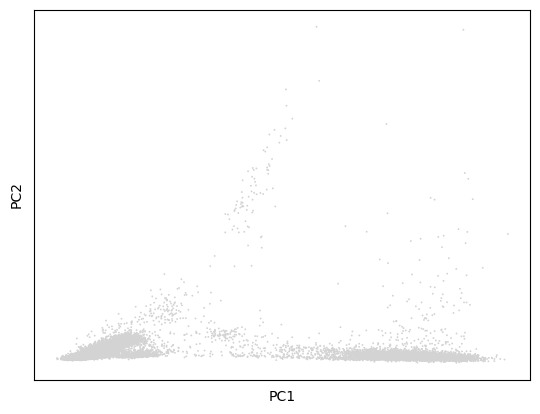

In [10]:
sc.pl.pca(adata_ref)

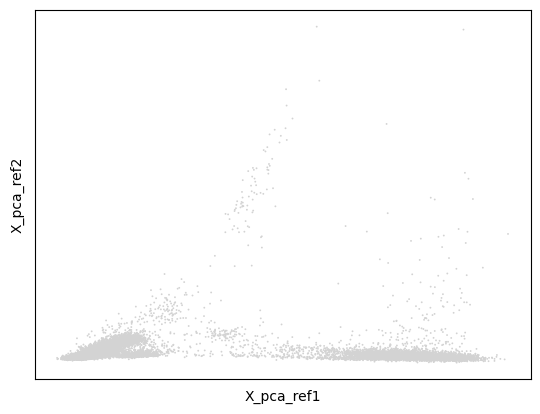

In [12]:
sc.pl.embedding(adata_query, query_basis_ref)

In [13]:
((adata_ref.obsm["X_pca"] - adata_query.obsm["X_pca_ref"]) < 1e-3).all()

True

In [14]:
dif = adata_ref.obsm["X_pca"] - adata_query.obsm["X_pca_ref"]

In [19]:
(dif > 1e-6).sum()

99360

In [20]:
(dif > 1e-5).sum()

2390

In [21]:
(dif > 1e-4).sum()

2